In [1]:
from pathlib import Path
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
subdirectory = Path('house-price')
df_train = pd.read_csv(subdirectory / 'dataset.csv')
df_test = pd.read_csv(subdirectory / 'test.csv')
print("No of training records: ", len(df_train))
print("No of features: ", len(df_train.columns))
#df_train.head()

No of training records:  200000
No of features:  47


In [30]:
from house_price_features import cluster_locations, plot_clusters, feature_engineering, assign_clusters
from house_price_optuna import run_winkler_predictor_optimization

# Geo clustering and feature engineering

No of clusters:  6666
No of columns in df_train_clusters:  56
No of columns in df_test_clusters:  55
Columns added with clustering:  {'clw_sale_days', 'clw_center_lon', 'clw_lon_km', 'clw_cluster', 'clw_radius_km', 'clw_time_km', 'clw_lat_km', 'clw_avg_sale_price', 'clw_center_lat'}
Additional columns available:  {'clw_center_lon_km', 'clw_center_lat_km', 'clw_sale_date', 'clw_distance_km'}


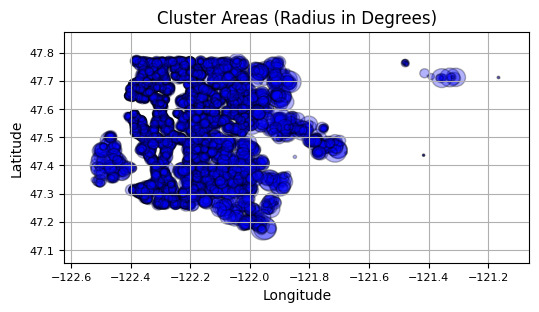

In [4]:
df_train_clusters_, clusters, cl_kmeans, cl_scaler, cl_time_scale = cluster_locations(df_train, n=30, time_scale=1/70)
df_train_clusters = assign_clusters(df_train, cl_kmeans, cl_scaler, clusters, cl_time_scale)
df_test_clusters = assign_clusters(df_test, cl_kmeans, cl_scaler, clusters, cl_time_scale)
print("No of clusters: ", len(clusters))
print("No of columns in df_train_clusters: ", len(df_train_clusters.columns))
print("No of columns in df_test_clusters: ", len(df_test_clusters.columns))
print("Columns added with clustering: ", set(df_train_clusters.columns) - set(df_train.columns))
print("Additional columns available: ", set(df_train_clusters_.columns) - set(df_train_clusters.columns))
plot_clusters(clusters)

In [5]:
df_train_clusters_fe=feature_engineering(df_train_clusters)
df_test_clusters_fe=feature_engineering(df_test_clusters)

In [6]:
df_train_clusters_fe.dtypes.value_counts()

int64      37
float64    17
int32       4
Name: count, dtype: int64

# Grid search for best Winkler model

[I 2025-05-06 19:57:14,671] A new study created in memory with name: winkler_regressor_optimization


Starting hyperparameter optimization with n_trials: 4
Starting cross-validation with 3 folds:1 2 3 

[I 2025-05-06 19:57:50,287] Trial 0 finished with value: 353966.0571068346 and parameters: {'n_estimators': 400, 'learning_rate': 0.2536999076681771, 'max_depth': 8, 'min_child_samples': 64, 'subsample': 0.5780093202212182, 'colsample_bytree': 0.5779972601681014, 'reg_alpha': 3.3323645788192616e-08, 'reg_lambda': 0.6245760287469887}. Best is trial 0 with value: 353966.0571068346.


Mean Winkler score for this trial: 353966.06
Starting cross-validation with 3 folds:1 2 3 

[I 2025-05-06 19:58:11,425] Trial 1 finished with value: 360613.47061100486 and parameters: {'n_estimators': 700, 'learning_rate': 0.11114989443094977, 'max_depth': 3, 'min_child_samples': 98, 'subsample': 0.9162213204002109, 'colsample_bytree': 0.6061695553391381, 'reg_alpha': 4.329370014459266e-07, 'reg_lambda': 4.4734294104626844e-07}. Best is trial 0 with value: 353966.0571068346.


Mean Winkler score for this trial: 360613.47
Starting cross-validation with 3 folds:1 2 3 

[I 2025-05-06 19:58:45,438] Trial 2 finished with value: 357104.2074388631 and parameters: {'n_estimators': 400, 'learning_rate': 0.05958389350068958, 'max_depth': 6, 'min_child_samples': 36, 'subsample': 0.8059264473611898, 'colsample_bytree': 0.569746930326021, 'reg_alpha': 4.258943089524393e-06, 'reg_lambda': 1.9826980964985924e-05}. Best is trial 0 with value: 353966.0571068346.


Mean Winkler score for this trial: 357104.21
Starting cross-validation with 3 folds:1 2 3 

[I 2025-05-06 19:59:10,055] Trial 3 finished with value: 351067.7031747915 and parameters: {'n_estimators': 500, 'learning_rate': 0.14447746112718687, 'max_depth': 4, 'min_child_samples': 56, 'subsample': 0.7962072844310213, 'colsample_bytree': 0.5232252063599989, 'reg_alpha': 0.0029369981104377003, 'reg_lambda': 3.425445902633376e-07}. Best is trial 3 with value: 351067.7031747915.


Mean Winkler score for this trial: 351067.70
Number of finished trials: 4
Best Winkler score: 351067.70
Best hyperparameters: {'n_estimators': 500, 'learning_rate': 0.14447746112718687, 'max_depth': 4, 'min_child_samples': 56, 'subsample': 0.7962072844310213, 'colsample_bytree': 0.5232252063599989, 'reg_alpha': 0.0029369981104377003, 'reg_lambda': 3.425445902633376e-07}

Evaluating the best model on test data...


/Users/cegielarafal/Sandbox/kaggle/house_price_optuna.py:336: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.

/Users/cegielarafal/Sandbox/kaggle/house_price_optuna.py:337: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



Winkler score on test data: 347140.00
Mean interval width: 249041.25
Coverage rate: 0.88
Target coverage rate: 0.90

Feature Importances:
                    point_model  lower_model  upper_model
clw_sale_days               583          640          629
clw_avg_sale_price          566          491          537
land_val                    457          401          445
year_built                  311          340          283
imp_val                     399          335          373
sqft                        334          277          313
clw_time_km                 256          272          275
sqft_lot                    254          255          374
latitude                    189          254          248
sale_warning                130          223           80
clw_center_lon              158          214          183
join_status                 291          200          194
zoning                      205          199          193
longitude                   171          198      

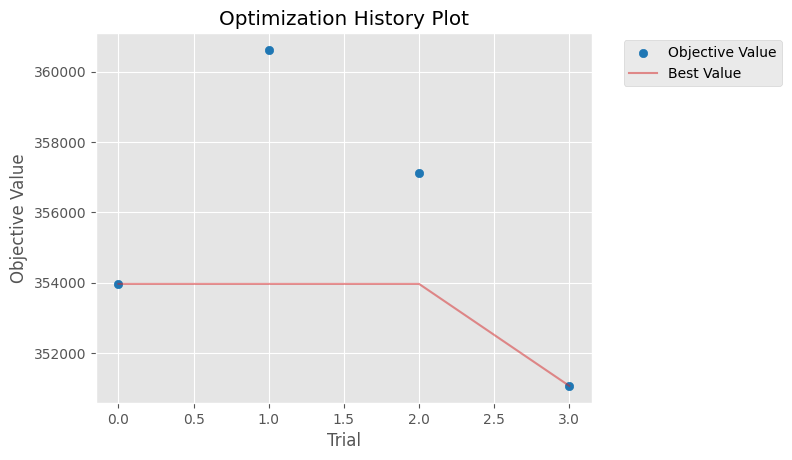

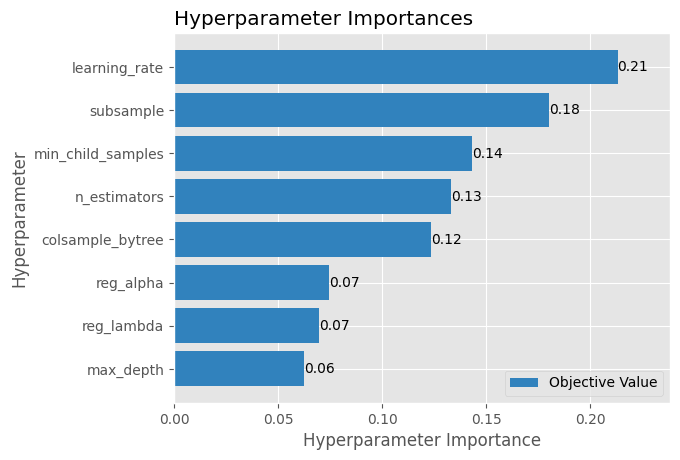

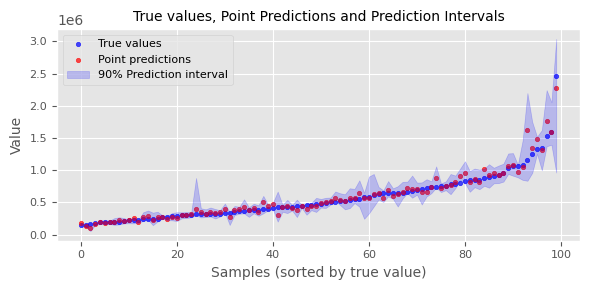


Optimization and evaluation complete!
Final optimized parameters (with alpha fixed at 0.1):
  n_estimators: 500
  learning_rate: 0.14447746112718687
  max_depth: 4
  min_child_samples: 56
  subsample: 0.7962072844310213
  colsample_bytree: 0.5232252063599989
  reg_alpha: 0.0029369981104377003
  reg_lambda: 3.425445902633376e-07


In [ ]:
best_model, best_params = run_winkler_predictor_optimization(df_train_clusters_fe, n_trials=100, cv_folds=5, alpha=0.1)

In [43]:
# plot_winkler_optimization_results(study)
best_model

WinklerOptimizedRegressor(colsample_bytree=0.569746930326021,
                          learning_rate=0.05958389350068958, max_depth=6,
                          min_child_samples=36, n_estimators=400,
                          reg_alpha=4.258943089524393e-06,
                          reg_lambda=1.9826980964985924e-05,
                          subsample=0.8059264473611898)

# Submit results

In [21]:
lower_bounds, upper_bounds = best_model.predict_interval(df_test_clusters_fe)

result_df = pd.DataFrame({
        'id': df_test_clusters_fe['id'],
        'pi_lower': lower_bounds,
        'pi_upper': upper_bounds
    })

result_df.to_csv(subdirectory / 'submission.csv', index=False)